In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


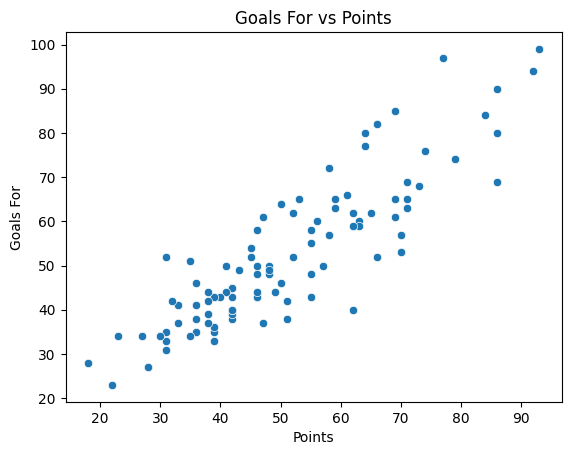

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Data&InfoEngineering/2021-2022 Football Team Stats.csv', encoding='ISO-8859-1', delimiter=';')

# Encoding categorical variables
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])

# Scatter plot of Goals For vs Points
sns.scatterplot(x='Pts', y='GF', data=df)
plt.title('Goals For vs Points')
plt.xlabel('Points')
plt.ylabel('Goals For')
plt.show()

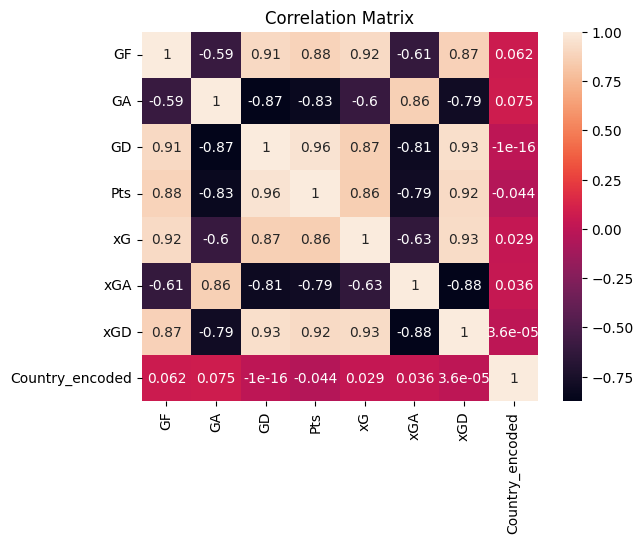

In [12]:
# Correlation matrix
correlation_matrix = df[['GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD', 'Country_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Mean Squared Error: 29.565075


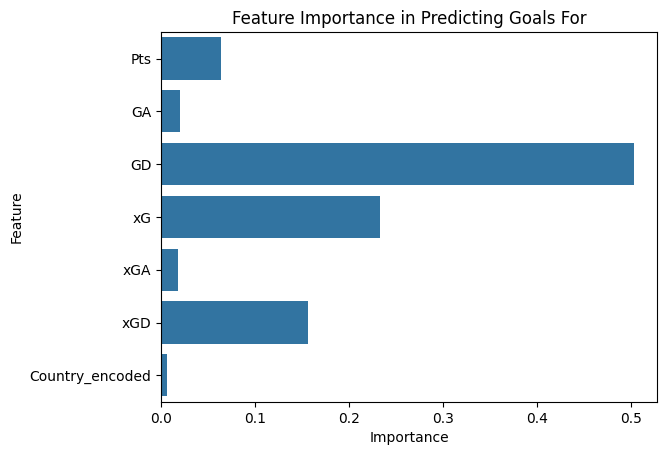

In [13]:
# Predictive modeling
# Selecting features and target
X = df[['Pts', 'GA', 'GD', 'xG', 'xGA', 'xGD', 'Country_encoded']]  # Selected based on the context and data understanding
y = df['GF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Feature importance
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importance in Predicting Goals For')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

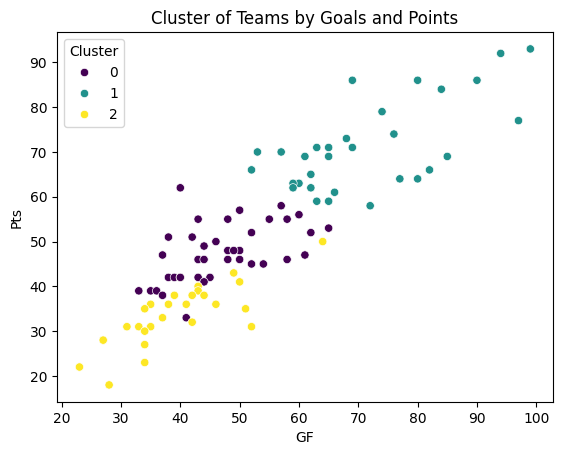

In [9]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(df[['GF', 'GA', 'Pts', 'xG', 'xGA']])

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Specifying n_init to suppress warning
clusters = kmeans.fit_predict(team_stats_scaled)
df['Cluster'] = clusters

# Visualize the clusters
sns.scatterplot(x='GF', y='Pts', hue='Cluster', data=df, palette='viridis')  # Changed 'viridian' to 'viridis'
plt.title('Cluster of Teams by Goals and Points')
plt.show()
